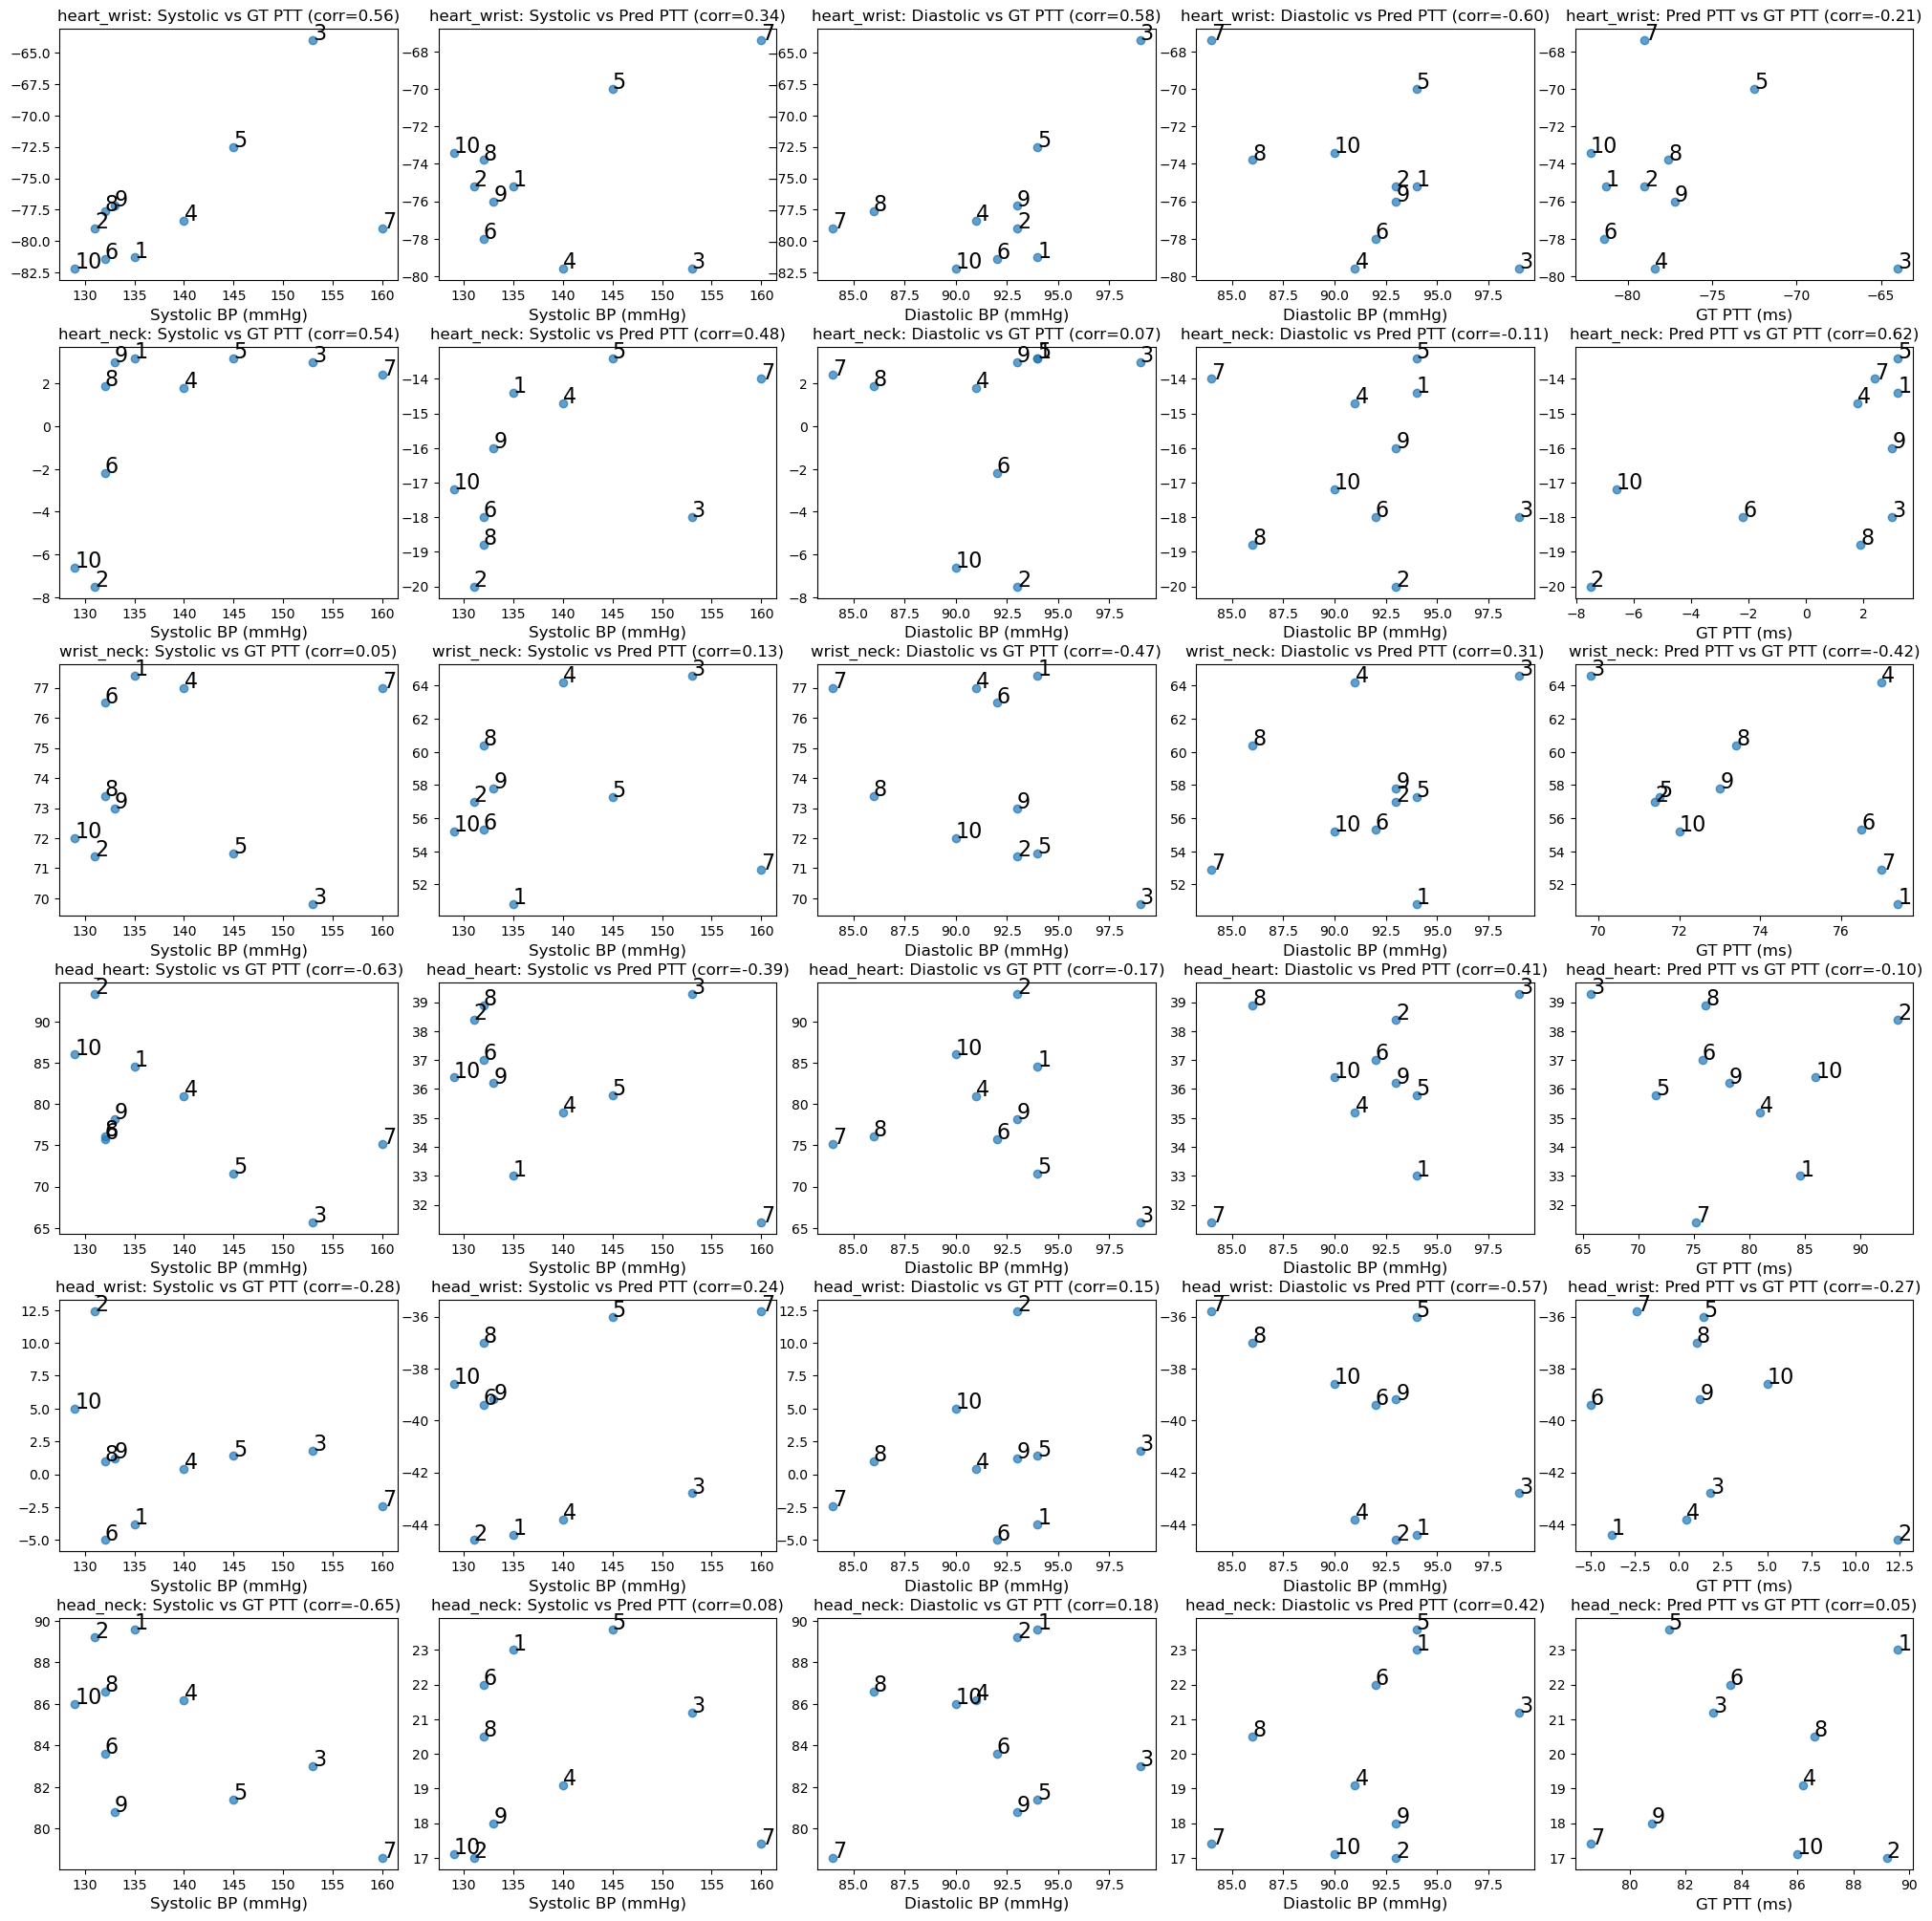

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Read the CSV file
df = pd.read_csv('results/bp_eval/fusion_v3/bill_ptt_bp_data.csv')
# df = pd.read_csv('results/bp_eval/fusion_v1/sean_ptt_bp_data.csv')

# Add order numbers
df['order'] = range(1, len(df) + 1)

# Define site pairs
site_pairs = [
    'heart_wrist', 
    'heart_neck', 
    'wrist_neck', 
    'head_heart', 
    'head_wrist', 
    'head_neck'
]

# Create a figure with subplots for each site pair
num_pairs = len(site_pairs)
fig, axes = plt.subplots(num_pairs, 5, figsize=(20, 5*num_pairs*2/3))
plt.rcParams.update({'font.size': 14})  # Increase base font size

for i, site_pair in enumerate(site_pairs):
    # Get PTT column names
    gt_col = f'ptt_{site_pair}_gt'
    pred_col = f'ptt_{site_pair}_pred'
    gt_ptt = df[gt_col]
    pred_ptt = df[pred_col] 
    # Calculate correlations
    sys_gt_corr = np.corrcoef(df['sys'], gt_ptt)[0,1]
    sys_pred_corr = np.corrcoef(df['sys'], pred_ptt)[0,1]
    dia_gt_corr = np.corrcoef(df['dia'], gt_ptt)[0,1]
    dia_pred_corr = np.corrcoef(df['dia'], pred_ptt)[0,1]
    
    # Plot systolic vs ground truth
    axes[i,0].scatter(df['sys'], gt_ptt, alpha=0.7)
    for j, txt in enumerate(df['order']):
        axes[i,0].annotate(txt, (df['sys'].iloc[j], gt_ptt.iloc[j]), fontsize=16)
    axes[i,0].set_title(f'{site_pair}: Systolic vs GT PTT (corr={sys_gt_corr:.2f})', fontsize=12)
    axes[i,0].set_xlabel('Systolic BP (mmHg)', fontsize=12)
    # axes[i,0].set_ylabel('PTT (ms)', fontsize=12)
    axes[i,0].tick_params(axis='both', labelsize=10)

    # Plot systolic vs predicted
    axes[i,1].scatter(df['sys'], pred_ptt, alpha=0.7)
    for j, txt in enumerate(df['order']):
        axes[i,1].annotate(txt, (df['sys'].iloc[j], pred_ptt.iloc[j]), fontsize=16)
    axes[i,1].set_title(f'{site_pair}: Systolic vs Pred PTT (corr={sys_pred_corr:.2f})', fontsize=12)
    axes[i,1].set_xlabel('Systolic BP (mmHg)', fontsize=12)
    # axes[i,1].set_ylabel('PTT (ms)', fontsize=12)
    axes[i,1].tick_params(axis='both', labelsize=10)

    # Plot diastolic vs ground truth
    axes[i,2].scatter(df['dia'], gt_ptt, alpha=0.7)
    for j, txt in enumerate(df['order']):
        axes[i,2].annotate(txt, (df['dia'].iloc[j], gt_ptt.iloc[j]), fontsize=16)
    axes[i,2].set_title(f'{site_pair}: Diastolic vs GT PTT (corr={dia_gt_corr:.2f})', fontsize=12)
    axes[i,2].set_xlabel('Diastolic BP (mmHg)', fontsize=12)
    # axes[i,2].set_ylabel('PTT (ms)', fontsize=12)
    axes[i,2].tick_params(axis='both', labelsize=10)

    # Plot diastolic vs predicted
    axes[i,3].scatter(df['dia'], pred_ptt, alpha=0.7)
    for j, txt in enumerate(df['order']):
        axes[i,3].annotate(txt, (df['dia'].iloc[j], pred_ptt.iloc[j]), fontsize=16)
    axes[i,3].set_title(f'{site_pair}: Diastolic vs Pred PTT (corr={dia_pred_corr:.2f})', fontsize=12)
    axes[i,3].set_xlabel('Diastolic BP (mmHg)', fontsize=12)
    # axes[i,3].set_ylabel('PTT (ms)', fontsize=12)
    axes[i,3].tick_params(axis='both', labelsize=10)

    axes[i,4].scatter(gt_ptt, pred_ptt, alpha=0.7)
    for j, txt in enumerate(df['order']):
        axes[i,4].annotate(txt, (gt_ptt.iloc[j], pred_ptt.iloc[j]), fontsize=16)
    axes[i,4].set_title(f'{site_pair}: Pred PTT vs GT PTT (corr={np.corrcoef(pred_ptt, gt_ptt)[0,1]:.2f})', fontsize=12)
    axes[i,4].set_xlabel('GT PTT (ms)', fontsize=12)
    # axes[i,4].set_ylabel('Pred PTT (ms)', fontsize=12)
    axes[i,4].tick_params(axis='both', labelsize=10)
    
plt.tight_layout(pad=0.25, h_pad=0.25, w_pad=0)
plt.show()


biran_ptt_bp_data.csv - heart_wrist Results:
Ground Truth - Mean Systolic Error: 7.73 mmHg
Ground Truth - Median Systolic Error: 5.14 mmHg
Ground Truth - Mean Diastolic Error: 3.67 mmHg
Ground Truth - Median Diastolic Error: 3.14 mmHg
Predicted - Mean Systolic Error: 13.45 mmHg
Predicted - Median Systolic Error: 8.37 mmHg
Predicted - Mean Diastolic Error: 5.17 mmHg
Predicted - Median Diastolic Error: 4.33 mmHg

biran_ptt_bp_data.csv - heart_neck Results:
Ground Truth - Mean Systolic Error: 11.97 mmHg
Ground Truth - Median Systolic Error: 8.85 mmHg
Ground Truth - Mean Diastolic Error: 4.95 mmHg
Ground Truth - Median Diastolic Error: 3.60 mmHg
Predicted - Mean Systolic Error: 13.47 mmHg
Predicted - Median Systolic Error: 12.86 mmHg
Predicted - Mean Diastolic Error: 5.90 mmHg
Predicted - Median Diastolic Error: 4.98 mmHg

biran_ptt_bp_data.csv - wrist_neck Results:
Ground Truth - Mean Systolic Error: 23.12 mmHg
Ground Truth - Median Systolic Error: 9.63 mmHg
Ground Truth - Mean Diastolic

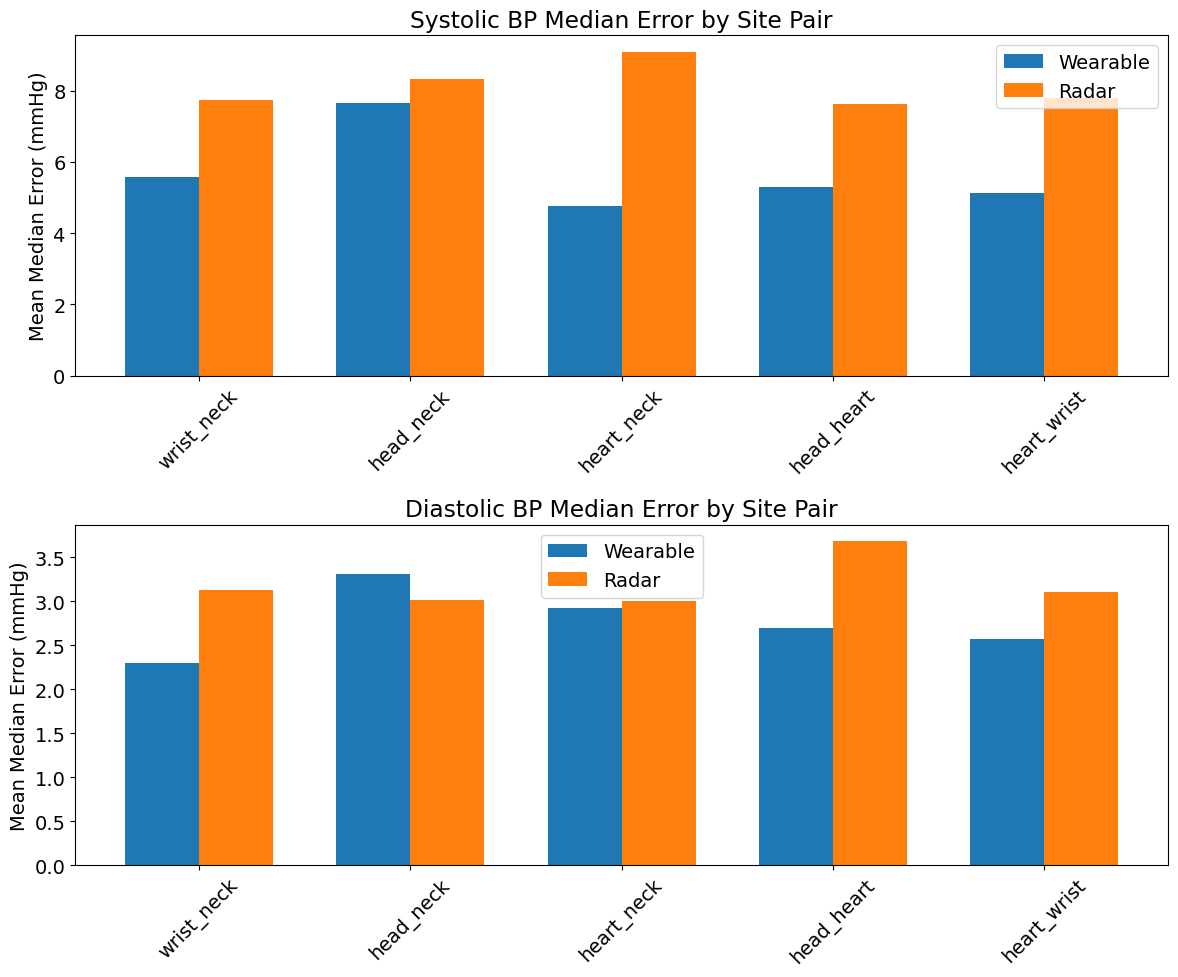

In [51]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

filelist = ['biran_ptt_bp_data.csv', 'yuxing_ptt_bp_data.csv', 'kuang_ptt_bp_data.csv', 'sarah_ptt_bp_data.csv']
k = 2

all_sys_errors_gt = []
all_dia_errors_gt = []
all_sys_errors_pred = []
all_dia_errors_pred = []
site_results = []

for file in filelist:
    df = pd.read_csv(f'results/ptt_figures/{file}')
    
    for i, site_pair in enumerate(site_pairs):
        # Get PTT column names
        gt_col = f'ptt_{site_pair}_gt'
        pred_col = f'ptt_{site_pair}_pred'
        gt_ptt = 1/df[gt_col]
        pred_ptt = 1/df[pred_col]
        
        data = pd.DataFrame({
            'sys': df['sys'],
            'dia': df['dia'],
            'gt_ptt': gt_ptt,
            'pred_ptt': pred_ptt
        })
        
        # Shuffle the data
        data = data.sample(frac=1, random_state=42).reset_index(drop=True)
        
        # Initialize arrays to store errors
        sys_errors_gt = []
        dia_errors_gt = []
        sys_errors_pred = []
        dia_errors_pred = []
        
        # Perform k-fold cross validation
        fold_size = len(data) // k
        for fold in range(k):
            # Split data into train and test
            test_start = fold * fold_size
            test_end = (fold + 1) * fold_size if fold < k - 1 else len(data)
            test_data = data.iloc[test_start:test_end]
            train_data = pd.concat([data.iloc[:test_start], data.iloc[test_end:]])
            
            # Train linear models for ground truth PTT
            sys_model_gt = LinearRegression()
            dia_model_gt = LinearRegression()
            sys_model_gt.fit(train_data[['gt_ptt']], train_data['sys'])
            dia_model_gt.fit(train_data[['gt_ptt']], train_data['dia'])
            
            # Train linear models for predicted PTT
            sys_model_pred = LinearRegression()
            dia_model_pred = LinearRegression()
            sys_model_pred.fit(train_data[['pred_ptt']], train_data['sys'])
            dia_model_pred.fit(train_data[['pred_ptt']], train_data['dia'])
            
            # Calculate errors on test set
            sys_errors_gt.extend(abs(test_data['sys'] - sys_model_gt.predict(test_data[['gt_ptt']])))
            dia_errors_gt.extend(abs(test_data['dia'] - dia_model_gt.predict(test_data[['gt_ptt']])))
            sys_errors_pred.extend(abs(test_data['sys'] - sys_model_pred.predict(test_data[['pred_ptt']])))
            dia_errors_pred.extend(abs(test_data['dia'] - dia_model_pred.predict(test_data[['pred_ptt']])))
        
        # Add errors to overall lists
        all_sys_errors_gt.extend(sys_errors_gt)
        all_dia_errors_gt.extend(dia_errors_gt)
        all_sys_errors_pred.extend(sys_errors_pred)
        all_dia_errors_pred.extend(dia_errors_pred)
        
        print(f"\n{file} - {site_pair} Results:")
        print(f"Ground Truth - Mean Systolic Error: {np.mean(sys_errors_gt):.2f} mmHg")
        print(f"Ground Truth - Median Systolic Error: {np.median(sys_errors_gt):.2f} mmHg")
        print(f"Ground Truth - Mean Diastolic Error: {np.mean(dia_errors_gt):.2f} mmHg")
        print(f"Ground Truth - Median Diastolic Error: {np.median(dia_errors_gt):.2f} mmHg")
        print(f"Predicted - Mean Systolic Error: {np.mean(sys_errors_pred):.2f} mmHg")
        print(f"Predicted - Median Systolic Error: {np.median(sys_errors_pred):.2f} mmHg")
        print(f"Predicted - Mean Diastolic Error: {np.mean(dia_errors_pred):.2f} mmHg")
        print(f"Predicted - Median Diastolic Error: {np.median(dia_errors_pred):.2f} mmHg")
        
        # Store results for plotting
        site_results.append({
            'file': file,
            'site': site_pair,
            'sys_gt_med': sys_errors_gt,
            'dia_gt_med': dia_errors_gt,
            'sys_pred_med': sys_errors_pred,
            'dia_pred_med': dia_errors_pred
        })

print("\nOverall Results (across all files and sites):")
print(f"Ground Truth - Mean Systolic Error: {np.mean(all_sys_errors_gt):.2f} mmHg")
print(f"Ground Truth - Median Systolic Error: {np.median(all_sys_errors_gt):.2f} mmHg")
print(f"Ground Truth - Mean Diastolic Error: {np.mean(all_dia_errors_gt):.2f} mmHg")
print(f"Ground Truth - Median Diastolic Error: {np.median(all_dia_errors_gt):.2f} mmHg")
print(f"Predicted - Mean Systolic Error: {np.mean(all_sys_errors_pred):.2f} mmHg")
print(f"Predicted - Median Systolic Error: {np.median(all_sys_errors_pred):.2f} mmHg")
print(f"Predicted - Mean Diastolic Error: {np.mean(all_dia_errors_pred):.2f} mmHg")
print(f"Predicted - Median Diastolic Error: {np.median(all_dia_errors_pred):.2f} mmHg")

# Create bar plots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# Group results by site pair
sites = list(set([r['site'] for r in site_results]))
files = list(set([r['file'] for r in site_results]))
# print(sites, files)
x = np.arange(len(sites))
width = 0.35

# Calculate averages across files for each site
sys_gt = []
sys_pred = []
dia_gt = []
dia_pred = []

for site in sites:
    site_data = [r for r in site_results if r['site'] == site]
    sys_gt_all = np.concatenate([r['sys_gt_med'] for r in site_data])
    sys_pred_all = np.concatenate([r['sys_pred_med'] for r in site_data])
    dia_gt_all = np.concatenate([r['dia_gt_med'] for r in site_data])
    dia_pred_all = np.concatenate([r['dia_pred_med'] for r in site_data])
    sys_gt.append(np.median(sys_gt_all))
    sys_pred.append(np.median(sys_pred_all))
    dia_gt.append(np.median(dia_gt_all))
    dia_pred.append(np.median(dia_pred_all))
    
    # print the 50th, 75th, and 90th percentiles for sys_gt_all, sys_pred_all, dia_gt_all, and dia_pred_all
    print(f"{site}:")
    print(f"sys_gt_all: 50th: {np.percentile(sys_gt_all, 50):.2f}, 75th: {np.percentile(sys_gt_all, 75):.2f}, 90th: {np.percentile(sys_gt_all, 90):.2f}")
    print(f"sys_pred_all: 50th: {np.percentile(sys_pred_all, 50):.2f}, 75th: {np.percentile(sys_pred_all, 75):.2f}, 90th: {np.percentile(sys_pred_all, 90):.2f}")
    print(f"dia_gt_all: 50th: {np.percentile(dia_gt_all, 50):.2f}, 75th: {np.percentile(dia_gt_all, 75):.2f}, 90th: {np.percentile(dia_gt_all, 90):.2f}")
    print(f"dia_pred_all: 50th: {np.percentile(dia_pred_all, 50):.2f}, 75th: {np.percentile(dia_pred_all, 75):.2f}, 90th: {np.percentile(dia_pred_all, 90):.2f}")

# Systolic plot
ax1.bar(x - width/2, sys_gt, width, label='Wearable')
ax1.bar(x + width/2, sys_pred, width, label='Radar')
ax1.set_ylabel('Mean Median Error (mmHg)')
ax1.set_title('Systolic BP Median Error by Site Pair')
ax1.set_xticks(x)
ax1.set_xticklabels(sites, rotation=45)
ax1.legend()

# Diastolic plot
ax2.bar(x - width/2, dia_gt, width, label='Wearable')
ax2.bar(x + width/2, dia_pred, width, label='Radar')
ax2.set_ylabel('Mean Median Error (mmHg)')
ax2.set_title('Diastolic BP Median Error by Site Pair')
ax2.set_xticks(x)
ax2.set_xticklabels(sites, rotation=45)
ax2.legend()

plt.tight_layout()
plt.show()

In [10]:
np.mean(np.concatenate([r['sys_gt_med'] for r in site_results]))

9.14874471733583

In [11]:
np.concatenate([r['sys_gt_med'] for r in site_results]).shape

(280,)

In [ ]:
[r['sys_gt_med'] for r in site_data]